In [2]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import numpy as np
import mne

In [3]:
path = '/blue/gkalamangalam/jmark.ettinger/eegCompress/processedData/origAndPredictedLossy.npz'
temp = np.load(path)
data = temp['arr_0']
predicted = temp['arr_1']
residual = data - predicted
print(np.mean(np.abs(residual)), np.max(np.abs(residual)))

1.0253046 7.686386


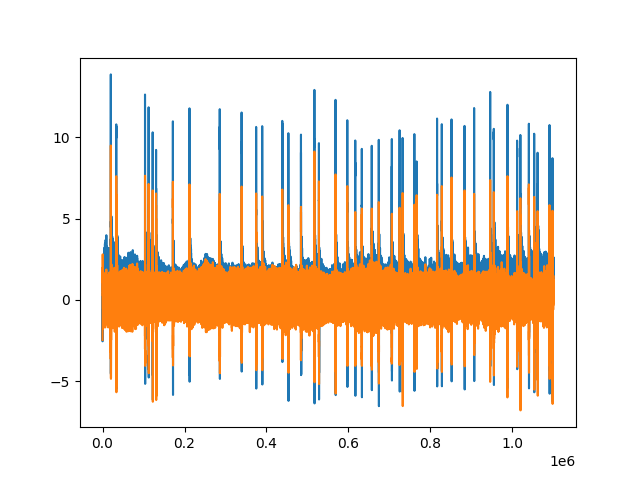

In [6]:
channel = 1

plt.figure()
plt.plot(predicted[channel,:])
plt.plot(data[channel,:])
#plt.plot(residual[channel,:])
plt.show()

# Export to EDF

In [5]:
goodChannels = ['Fp1','F3','C3','P3','O1','Fp2','F4','C4','P4','O2','F7','T7','P7','F8','T8','P8','Fz','Cz','Pz']
info = mne.create_info(sfreq=256, ch_names=goodChannels)

path = '/blue/gkalamangalam/jmark.ettinger/eegCompress/processedData/original.edf'
raw = mne.io.RawArray(data, info)
mne.export.export_raw(path, raw, fmt='edf', overwrite=True)

path = '/blue/gkalamangalam/jmark.ettinger/eegCompress/processedData/compressed.edf'
raw = mne.io.RawArray(predicted, info)
mne.export.export_raw(path, raw, fmt='edf', overwrite=True)

Creating RawArray with float64 data, n_channels=19, n_times=1100367
    Range : 0 ... 1100366 =      0.000 ...  4298.305 secs
Ready.
Overwriting existing file.
Creating RawArray with float64 data, n_channels=19, n_times=1100367
    Range : 0 ... 1100366 =      0.000 ...  4298.305 secs
Ready.
Overwriting existing file.


/scratch/local/63359439/ipykernel_1439786/2039930254.py:8: RuntimeWarning: EDF format requires equal-length data blocks, so 0.69140625 seconds of zeros were appended to all channels when writing the final block.
  mne.export.export_raw(path, raw, fmt='edf', overwrite=True)
/scratch/local/63359439/ipykernel_1439786/2039930254.py:12: RuntimeWarning: EDF format requires equal-length data blocks, so 0.69140625 seconds of zeros were appended to all channels when writing the final block.
  mne.export.export_raw(path, raw, fmt='edf', overwrite=True)
